In [2]:
## | Analysis of Variance  


## A Worked-Out Example
results <- read.table('yields(1).txt',header=T)
attach(results)
str(results)
head(results, n=4)

'data.frame':	10 obs. of  3 variables:
 $ sand: int  6 10 8 6 14 17 9 11 7 11
 $ clay: int  17 15 3 11 14 12 12 8 10 13
 $ loam: int  13 16 9 12 15 16 17 13 18 14


,sand,clay,loam
,<int>,<int>,<int>
1,6,17,13
2,10,15,16
3,8,3,9
4,6,11,12


In [3]:
apply(results, 2, mean)
# Another possibility
sapply(list(sand,clay,loam),mean)

sand clay loam 
 9.9 11.5 14.3

[1]  9.9 11.5 14.3

In [5]:
frame <- stack(results)
str(frame)
head(frame)

'data.frame':	30 obs. of  2 variables:
 $ values: int  6 10 8 6 14 17 9 11 7 11 ...
 $ ind   : Factor w/ 3 levels "sand","clay",..: 1 1 1 1 1 1 1 1 1 1 ...


,values,ind
,<int>,<fct>
1,6,sand
2,10,sand
3,8,sand
4,6,sand
5,14,sand
6,17,sand


In [6]:
names(frame) <- c('yield','soil')
attach(frame)
head(frame)

,yield,soil
,<int>,<fct>
1,6,sand
2,10,sand
3,8,sand
4,6,sand
5,14,sand
6,17,sand


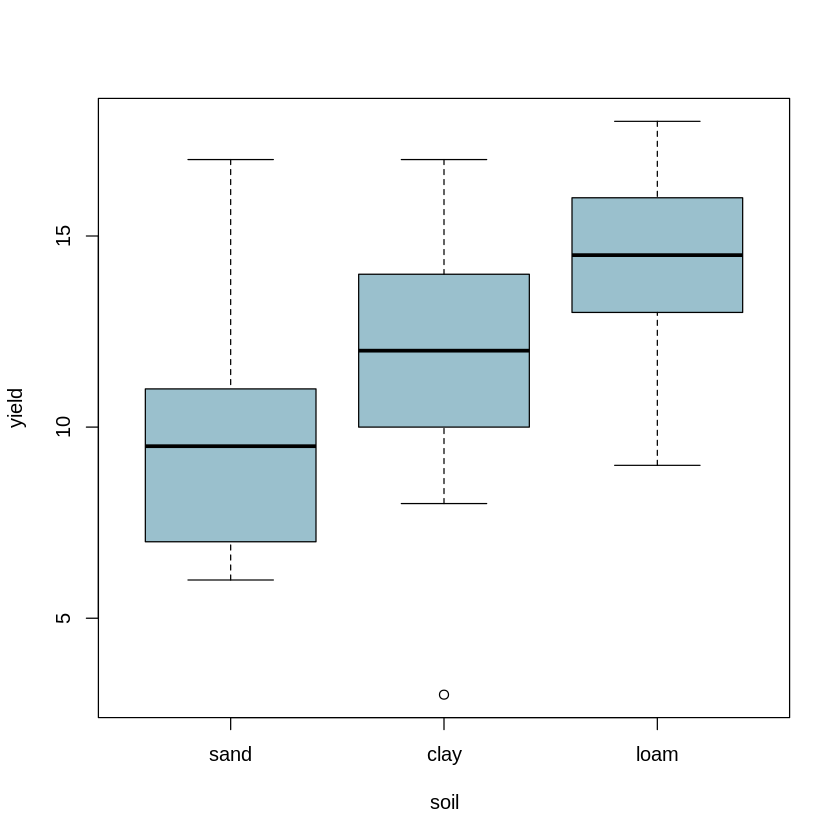

In [7]:
plot(yield~soil,col='lightblue3')

In [8]:
sum((yield-mean(yield))^2)

[1] 414.7

In [9]:
sand-mean(sand)
clay-mean(clay)
loam-mean(loam)

[1] -3.9  0.1 -1.9 -3.9  4.1  7.1 -0.9  1.1 -2.9  1.1

[1]  5.5  3.5 -8.5 -0.5  2.5  0.5  0.5 -3.5 -1.5  1.5

[1] -1.3  1.7 -5.3 -2.3  0.7  1.7  2.7 -1.3  3.7 -0.3

In [10]:
(sums.vec <- c(sum((sand-mean(sand))^2), sum((clay-mean(clay))^2),
  sum((loam-mean(loam))^2)))
sum(sums.vec)

[1] 112.9 138.5  64.1

[1] 315.5

In [11]:

sum(apply(results,2,
           function (x) sum((x-mean(x))^2) ))

[1] 315.5

In [12]:
#####A more convient way
apply(results,2,
           function (x) sum((x-mean(x))^2) )

sand  clay  loam 
112.9 138.5  64.1

In [13]:
sum(sapply(list(sand,clay,loam),
           function (x) sum((x-mean(x))^2) ))

[1] 315.5

In [14]:
apply(results, 2, var)
mean(apply(results, 2, var))

sand      clay      loam 
12.544444 15.388889  7.122222

[1] 11.68519

In [15]:
1-pf(4.24,2,27)

[1] 0.02503987

In [16]:
summary(aov(yield~soil))

            Df Sum Sq Mean Sq F value Pr(>F)  
soil         2   99.2   49.60   4.245  0.025 *
Residuals   27  315.5   11.69                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

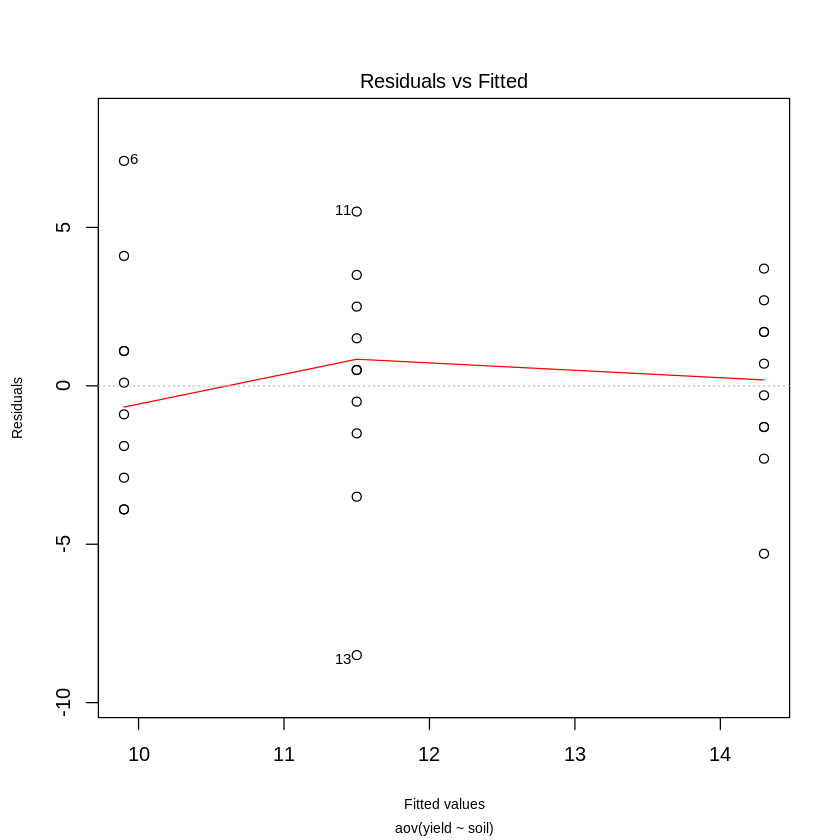

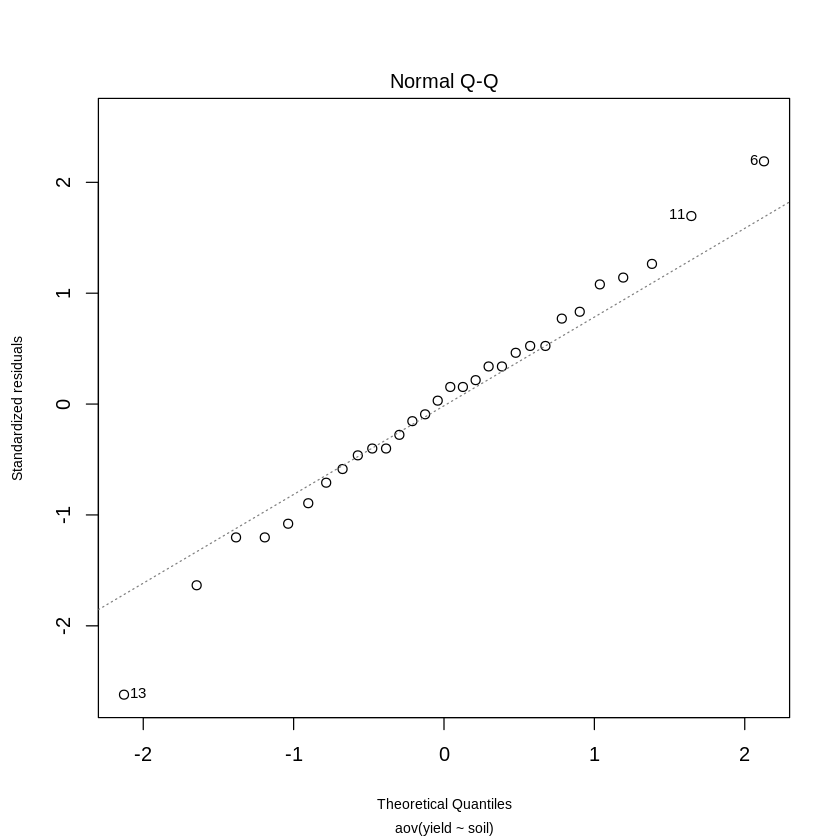

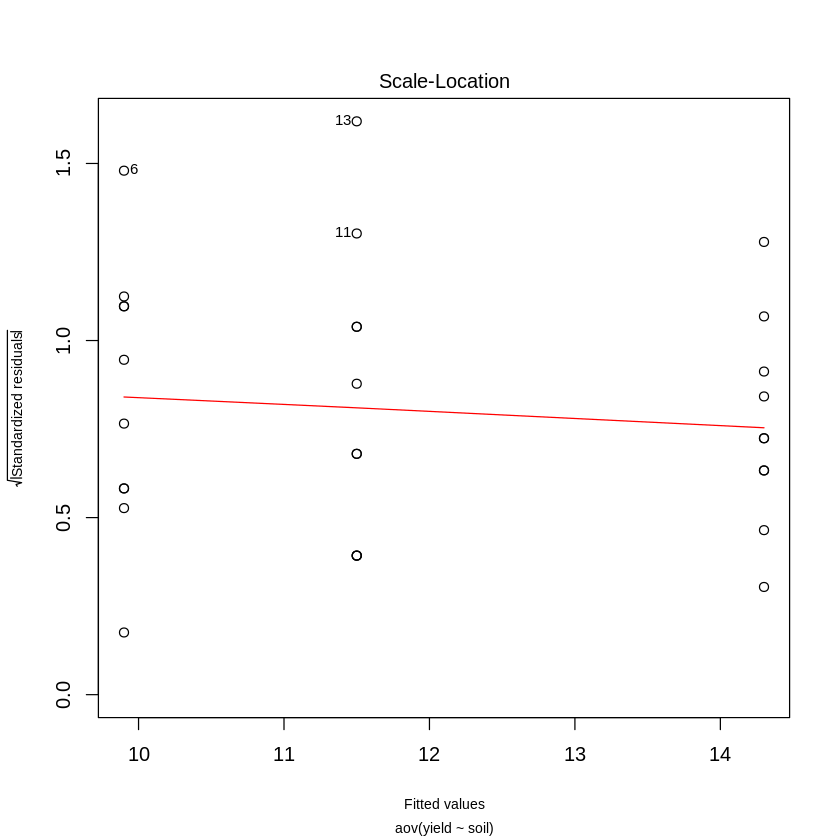

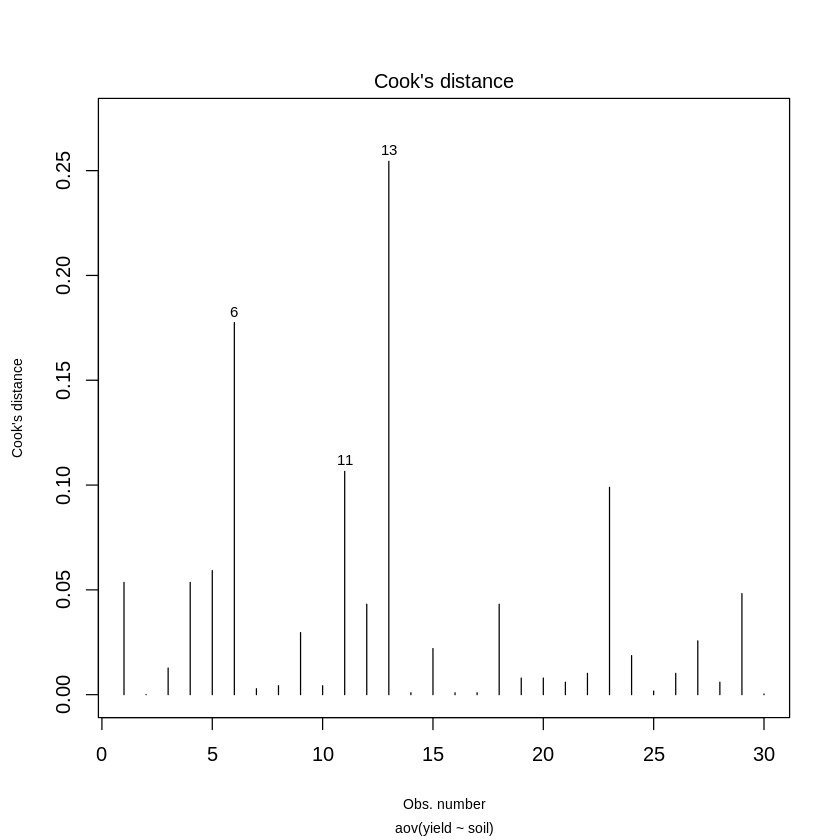

In [17]:
## Plots
plot(aov(yield~soil), which = 1, cex.lab=0.7, cex.sub=0.7)

plot(aov(yield~soil), which = 2, cex.lab=0.7, cex.sub=0.7)

plot(aov(yield~soil), which = 3, cex.lab=0.7, cex.sub=0.7)

plot(aov(yield~soil), which = 4, cex.lab=0.7, cex.sub=0.7)